# <span style="color:blue"> TP de Aprendizagem de Máquina </span>
#### Aluno: Geanderson Esteves dos Santos

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Build the model.
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=2)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Training Error: %.2f%%" % (100-scores[1]*100))
#print(100-scores[1]*100)

In [8]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para não tornar o número de testes muito elevados, ou seja, testar todas as combinações possíveis das variações que as features podem atingir, vamos assumir alguns valores 
### do TP de ML irão ser mantidas em um certo valor, e.g., 
### 1 - Testar o Learning rate para os 3 gradientes deixando o número de unidades fixados no default

In [27]:
def set_arrrays:
    inputsGD = []
    outputsGD = []
    inputsSGD = []
    outputsSGD = []
    inputsMiniBatch10 = []
    outputsMiniBatch10 = []
    inputsMiniBatch50 = []
    outputsMiniBatch50 = []

In [38]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient):
    lr = learning_rate
    un = unity
    
    if gradient == 'gd':
        inputsGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD.append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD.append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10.append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50.append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50.append(100-scores[1]*100)

In [39]:
# GD, lr = 0.5.
use_model(0.5, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 257us/step - loss: 2.3111 - acc: 0.1142 - val_loss: 2.3008 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 83us/step - loss: 2.3008 - acc: 0.1142 - val_loss: 2.2994 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 147us/step - loss: 2.2994 - acc: 0.1142 - val_loss: 2.2983 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 1s 132us/step - loss: 2.2983 - acc: 0.1142 - val_loss: 2.2972 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 83us/step - loss: 2.2972 - acc: 0.1142 - val_loss: 2.2961 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 85us/step - loss: 2.2961 - acc: 0.1142 - val_loss: 2.2951 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 81us/step - loss: 2.2951 - acc: 0.1142 - val_loss: 2.2939 - val_acc: 0.1142
Epoc

In [40]:
# GD, lr = 1.
use_model(1, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 426us/step - loss: 2.3229 - acc: 0.0912 - val_loss: 2.3042 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 87us/step - loss: 2.3042 - acc: 0.1142 - val_loss: 2.2959 - val_acc: 0.1270
Epoch 3/10
5000/5000 [==============================] - 0s 87us/step - loss: 2.2959 - acc: 0.1270 - val_loss: 2.2918 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 92us/step - loss: 2.2918 - acc: 0.1142 - val_loss: 2.2889 - val_acc: 0.1892
Epoch 5/10
5000/5000 [==============================] - 1s 132us/step - loss: 2.2889 - acc: 0.1892 - val_loss: 2.2860 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.2860 - acc: 0.1142 - val_loss: 2.2832 - val_acc: 0.1370
Epoch 7/10
5000/5000 [==============================] - 0s 84us/step - loss: 2.2832 - acc: 0.1370 - val_loss: 2.2801 - val_acc: 0.1142
Epoch

In [41]:
# GD, lr = 10.
use_model(10, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 310us/step - loss: 2.3147 - acc: 0.0924 - val_loss: 3.6965 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 1s 103us/step - loss: 3.6965 - acc: 0.1142 - val_loss: 2.9341 - val_acc: 0.1060
Epoch 3/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.9341 - acc: 0.1060 - val_loss: 2.7152 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 0s 77us/step - loss: 2.7152 - acc: 0.1000 - val_loss: 2.5734 - val_acc: 0.1060
Epoch 5/10
5000/5000 [==============================] - 0s 79us/step - loss: 2.5734 - acc: 0.1060 - val_loss: 2.4438 - val_acc: 0.1060
Epoch 6/10
5000/5000 [==============================] - 0s 78us/step - loss: 2.4438 - acc: 0.1060 - val_loss: 2.3454 - val_acc: 0.1060
Epoch 7/10
5000/5000 [==============================] - 0s 80us/step - loss: 2.3454 - acc: 0.1060 - val_loss: 2.3039 - val_acc: 0.1060
Epoch

In [42]:
# SGD, lr = 0.5.
use_model(0.5, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 54s 11ms/step - loss: 14.6286 - acc: 0.0922 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 2/10
5000/5000 [==============================] - 45s 9ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 3/10
5000/5000 [==============================] - 54s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 4/10
5000/5000 [==============================] - 51s 10ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 5/10
5000/5000 [==============================] - 42s 8ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 6/10
5000/5000 [==============================] - 50s 10ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_acc: 0.0924
Epoch 7/10
5000/5000 [==============================] - 54s 11ms/step - loss: 14.6288 - acc: 0.0924 - val_loss: 14.6288 - val_

In [11]:
# SGD, lr = 1.
use_model(1, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 40s 8ms/step - loss: 14.6357 - acc: 0.0918 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 37s 7ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 3/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 4/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 5/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 6/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 0.0920
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.6352 - val_acc: 

In [12]:
# SGD, lr = 10.
use_model(10, 50, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.4422 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 2/10
5000/5000 [==============================] - 37s 7ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 3/10
5000/5000 [==============================] - 42s 8ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 4/10
5000/5000 [==============================] - 38s 8ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 5/10
5000/5000 [==============================] - 39s 8ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 7/10
5000/5000 [==============================] - 37s 7ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.4418 - val_acc: 

In [13]:
# MB10, lr = 0.5.
use_model(0.5, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 1.5873 - acc: 0.4088 - val_loss: 0.6972 - val_acc: 0.7794
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.5970 - acc: 0.8006 - val_loss: 0.4926 - val_acc: 0.8190
Epoch 3/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4198 - acc: 0.8646 - val_loss: 0.3058 - val_acc: 0.9046
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3317 - acc: 0.8954 - val_loss: 0.2325 - val_acc: 0.9276
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2642 - acc: 0.9136 - val_loss: 0.2214 - val_acc: 0.9284
Epoch 6/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2186 - acc: 0.9306 - val_loss: 0.1483 - val_acc: 0.9574
Epoch 7/10
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1800 - acc: 0.9430 - val_loss: 0.2069 - val_acc: 0.9310
Epoch 8/10
500

In [14]:
# MB10, lr = 1.
use_model(1, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 2.0518 - acc: 0.2318 - val_loss: 1.2399 - val_acc: 0.4884
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.8496 - acc: 0.7070 - val_loss: 0.5306 - val_acc: 0.8224
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4780 - acc: 0.8492 - val_loss: 0.3456 - val_acc: 0.8948
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.3219 - acc: 0.8962 - val_loss: 0.2436 - val_acc: 0.9204
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.2317 - acc: 0.9296 - val_loss: 0.1631 - val_acc: 0.9498
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1730 - acc: 0.9446 - val_loss: 0.1200 - val_acc: 0.9598
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1176 - acc: 0.9614 - val_loss: 0.0746 - val_acc: 0.9782
Epoch 8/10
500

In [15]:
# MB10, lr = 10.
use_model(10, 50, 'mb10')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4877 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 6s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [20]:
# MB50, lr = 0.5.
use_model(0.5, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 483us/step - loss: 2.1606 - acc: 0.2056 - val_loss: 1.7183 - val_acc: 0.4034
Epoch 2/10
5000/5000 [==============================] - 2s 341us/step - loss: 1.2875 - acc: 0.5432 - val_loss: 0.9157 - val_acc: 0.6602
Epoch 3/10
5000/5000 [==============================] - 2s 334us/step - loss: 0.7754 - acc: 0.7384 - val_loss: 0.5877 - val_acc: 0.8192
Epoch 4/10
5000/5000 [==============================] - 2s 381us/step - loss: 0.5795 - acc: 0.8184 - val_loss: 0.5304 - val_acc: 0.8374
Epoch 5/10
5000/5000 [==============================] - 2s 383us/step - loss: 0.4880 - acc: 0.8546 - val_loss: 0.4712 - val_acc: 0.8538
Epoch 6/10
5000/5000 [==============================] - 2s 384us/step - loss: 0.4241 - acc: 0.8696 - val_loss: 0.3851 - val_acc: 0.8874
Epoch 7/10
5000/5000 [==============================] - 2s 341us/step - loss: 0.3894 - acc: 0.8804 - val_loss: 0.3970 - val_acc: 0.8736


In [21]:
# MB50, lr = 1.
use_model(1, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 3s 532us/step - loss: 2.1553 - acc: 0.2088 - val_loss: 1.6156 - val_acc: 0.4148
Epoch 2/10
5000/5000 [==============================] - 2s 368us/step - loss: 1.1202 - acc: 0.5990 - val_loss: 0.7736 - val_acc: 0.7188
Epoch 3/10
5000/5000 [==============================] - 2s 324us/step - loss: 0.6227 - acc: 0.7876 - val_loss: 0.5237 - val_acc: 0.8230
Epoch 4/10
5000/5000 [==============================] - 2s 355us/step - loss: 0.4749 - acc: 0.8498 - val_loss: 0.3996 - val_acc: 0.8698
Epoch 5/10
5000/5000 [==============================] - 2s 332us/step - loss: 0.3894 - acc: 0.8772 - val_loss: 0.3198 - val_acc: 0.9062
Epoch 6/10
5000/5000 [==============================] - 2s 339us/step - loss: 0.3357 - acc: 0.8980 - val_loss: 0.3578 - val_acc: 0.8808
Epoch 7/10
5000/5000 [==============================] - 2s 306us/step - loss: 0.3146 - acc: 0.9050 - val_loss: 0.2356 - val_acc: 0.9278


In [22]:
# MB50, lr = 10.
use_model(10, 50, 'mb50')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 2s 403us/step - loss: 2.5140 - acc: 0.0988 - val_loss: 2.4281 - val_acc: 0.0920
Epoch 2/10
5000/5000 [==============================] - 1s 298us/step - loss: 2.4186 - acc: 0.1006 - val_loss: 2.4801 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 2s 308us/step - loss: 2.5259 - acc: 0.0946 - val_loss: 2.3976 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 2s 408us/step - loss: 2.4135 - acc: 0.0958 - val_loss: 2.3873 - val_acc: 0.1024
Epoch 5/10
5000/5000 [==============================] - 2s 320us/step - loss: 2.4031 - acc: 0.0964 - val_loss: 2.4441 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 2s 308us/step - loss: 2.4183 - acc: 0.1010 - val_loss: 2.3830 - val_acc: 0.1000
Epoch 7/10
5000/5000 [==============================] - 2s 317us/step - loss: 2.3975 - acc: 0.1022 - val_loss: 2.3319 - val_acc: 0.0920


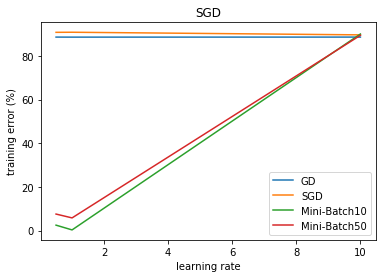

In [23]:
plt.plot(inputsGD, outputsGD, label='GD')
plt.plot(inputsSGD, outputsSGD, label='SGD')
plt.plot(inputsMiniBatch10, outputsMiniBatch10, label='Mini-Batch10')
plt.plot(inputsMiniBatch50, outputsMiniBatch50, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.ylabel('training error (%)')
plt.title("SGD")
plt.legend()
plt.show()

In [ ]:
# Limpar os arrays para testar outro features
set_arrays()

In [43]:
# GD, un = 25.
use_model(0.5, 25, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 298us/step - loss: 2.3028 - acc: 0.1142 - val_loss: 2.3000 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 1s 128us/step - loss: 2.3000 - acc: 0.1142 - val_loss: 2.2989 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 117us/step - loss: 2.2989 - acc: 0.1142 - val_loss: 2.2982 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 87us/step - loss: 2.2982 - acc: 0.1142 - val_loss: 2.2976 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 1s 102us/step - loss: 2.2976 - acc: 0.1142 - val_loss: 2.2970 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 1s 109us/step - loss: 2.2970 - acc: 0.1142 - val_loss: 2.2965 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.2965 - acc: 0.1142 - val_loss: 2.2960 - val_acc: 0.1142
Ep

In [45]:
# GD, un = 50.
use_model(0.5, 50, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 214us/step - loss: 2.3069 - acc: 0.0920 - val_loss: 2.3003 - val_acc: 0.1142
Epoch 2/10
5000/5000 [==============================] - 0s 87us/step - loss: 2.3003 - acc: 0.1142 - val_loss: 2.2991 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 0s 89us/step - loss: 2.2991 - acc: 0.1142 - val_loss: 2.2979 - val_acc: 0.1142
Epoch 4/10
5000/5000 [==============================] - 0s 86us/step - loss: 2.2979 - acc: 0.1142 - val_loss: 2.2968 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.2968 - acc: 0.1142 - val_loss: 2.2957 - val_acc: 0.1142
Epoch 6/10
5000/5000 [==============================] - 0s 87us/step - loss: 2.2957 - acc: 0.1142 - val_loss: 2.2946 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 0s 89us/step - loss: 2.2946 - acc: 0.1142 - val_loss: 2.2934 - val_acc: 0.1142
Epoch 

In [46]:
# GD, un = 100.
use_model(0.5, 100, 'gd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 214us/step - loss: 2.3380 - acc: 0.0920 - val_loss: 2.3194 - val_acc: 0.1076
Epoch 2/10
5000/5000 [==============================] - 1s 129us/step - loss: 2.3194 - acc: 0.1076 - val_loss: 2.3017 - val_acc: 0.1142
Epoch 3/10
5000/5000 [==============================] - 1s 125us/step - loss: 2.3017 - acc: 0.1142 - val_loss: 2.2983 - val_acc: 0.1076
Epoch 4/10
5000/5000 [==============================] - 0s 88us/step - loss: 2.2983 - acc: 0.1076 - val_loss: 2.2956 - val_acc: 0.1142
Epoch 5/10
5000/5000 [==============================] - 0s 83us/step - loss: 2.2956 - acc: 0.1142 - val_loss: 2.2931 - val_acc: 0.1988
Epoch 6/10
5000/5000 [==============================] - 0s 91us/step - loss: 2.2931 - acc: 0.1988 - val_loss: 2.2907 - val_acc: 0.1142
Epoch 7/10
5000/5000 [==============================] - 1s 105us/step - loss: 2.2907 - acc: 0.1142 - val_loss: 2.2884 - val_acc: 0.1760
Epo

In [48]:
# SGD, un = 25.
use_model(0.5, 25, 'sgd')

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 42s 8ms/step - loss: 3.6437 - acc: 0.1014 - val_loss: 2.9583 - val_acc: 0.1060
Epoch 2/10
5000/5000 [==============================] - 40s 8ms/step - loss: 1.9676 - acc: 0.4244 - val_loss: 1.4605 - val_acc: 0.5604
Epoch 3/10
5000/5000 [==============================] - 51s 10ms/step - loss: 2.3889 - acc: 0.3484 - val_loss: 1.9550 - val_acc: 0.2892
Epoch 4/10
5000/5000 [==============================] - 50s 10ms/step - loss: 2.0259 - acc: 0.3570 - val_loss: 1.9412 - val_acc: 0.3200
Epoch 5/10
5000/5000 [==============================] - 44s 9ms/step - loss: 1.9110 - acc: 0.3554 - val_loss: 2.1560 - val_acc: 0.2642
Epoch 6/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.1519 - acc: 0.2898 - val_loss: 2.4663 - val_acc: 0.2446
Epoch 7/10
5000/5000 [==============================] - 47s 9ms/step - loss: 2.0940 - acc: 0.2462 - val_loss: 2.1363 - val_acc: 0.1718
Epoch

In [ ]:
# SGD, un = 50.
use_model(0.5, 50, 'sgd')

In [ ]:
# SGD, un = 100.
use_model(0.5, 100, 'sgd')